## This is a notebook for showing extra capabilities of the `pyplot.matplotlib` library

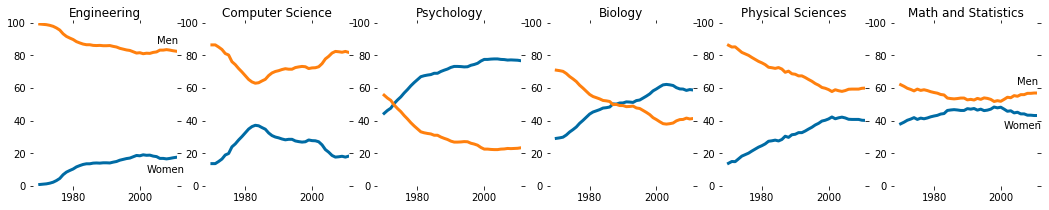

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Comparing across all degrees

**Generate a 6 row by 3 column grid of subplots.**
+ In the first column:
    + Generate line charts for both male and female percentages for every degree in stem_cats. Add text annotations for Women and Men in the topmost and bottommost plots.
+ In the second column:
    + Generate line charts for both male and female percentages for every degree in lib_arts_cats. Add text annotations for Women and Men for only the topmost plot (since the lines overlap at the end in the bottommost plot).
+ In the third column:
    + Generate line charts for both male and female percentages for every degree in other_cats. Add text annotations for Women and Men in the topmost and bottommost plots.

In [12]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

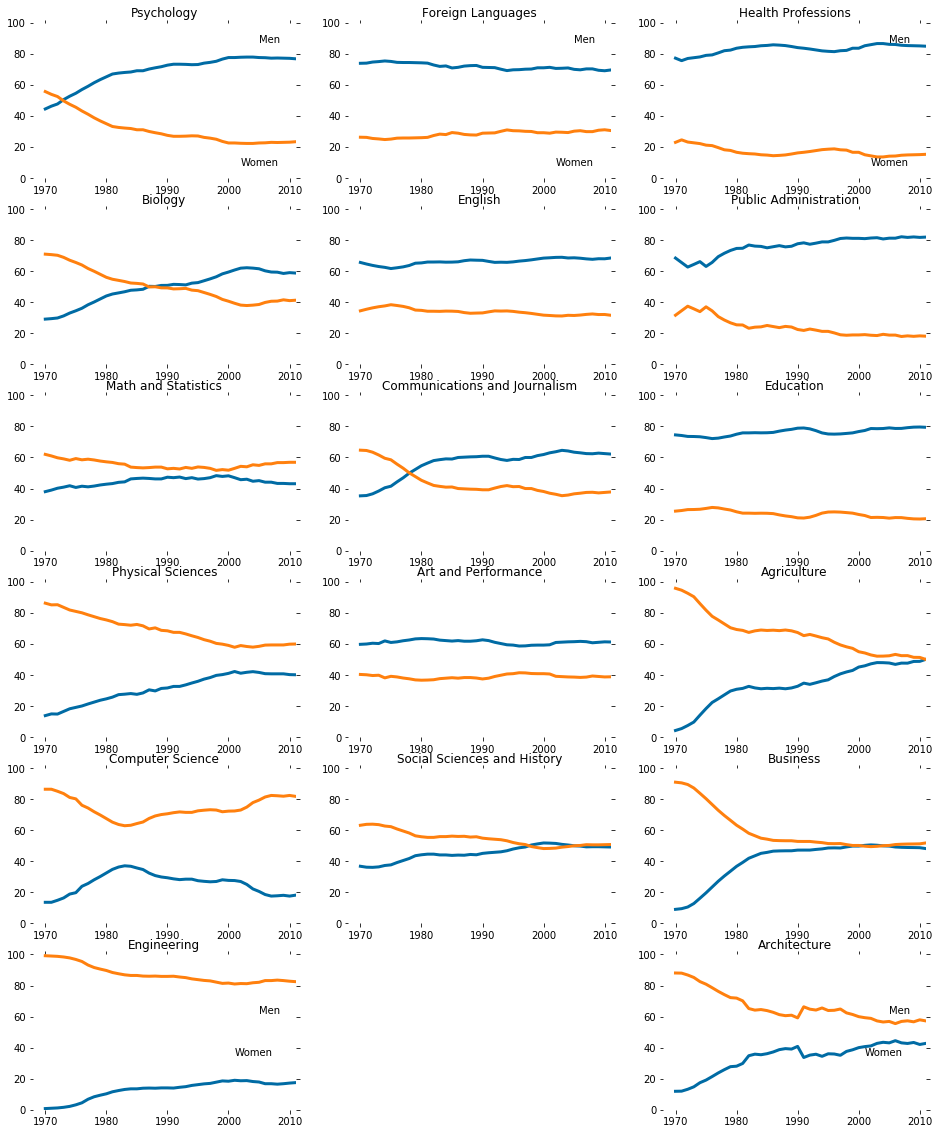

In [51]:
fig = plt.figure(figsize=(16, 20))
# Since I'm  too lazy to write 3 loops, I will iterate in a nested loop. The list below are the three categories
cats_list = [stem_cats,lib_arts_cats, other_cats]

# Because the subplot option does not allow to select the axis for the plot, but rather relies on a succesive index. We
# need to specify the positions of each plot at each loop. Here the index for one column plots is defined by a increment in 
# range position of 3(n of columns), and the starting values for the range are defined also by n, incremented by 1 per row.
range_tuples = [(0,18,3), (1,16,3), (2,20,3)]

for lst in cats_list:
    # the only weird thing here is the * operator in the second range of the zip. This allow the ouput of the list to be
    # enpacked as a tuple direct to the range function. the .index method returns the index as an integer of the main iter
    # list. Since the list has the same lenght like the tuples list, we can save us an extra iterator variable.
    for sp, rt in zip(range(len(lst)), range(*range_tuples[cats_list.index(lst)])):
        ax = fig.add_subplot(6,3,rt+1)
        ax.plot(women_degrees['Year'], women_degrees[lst[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lst[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(lst[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off")

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == 5:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')

  
plt.show()


### Hiding x-axis labels

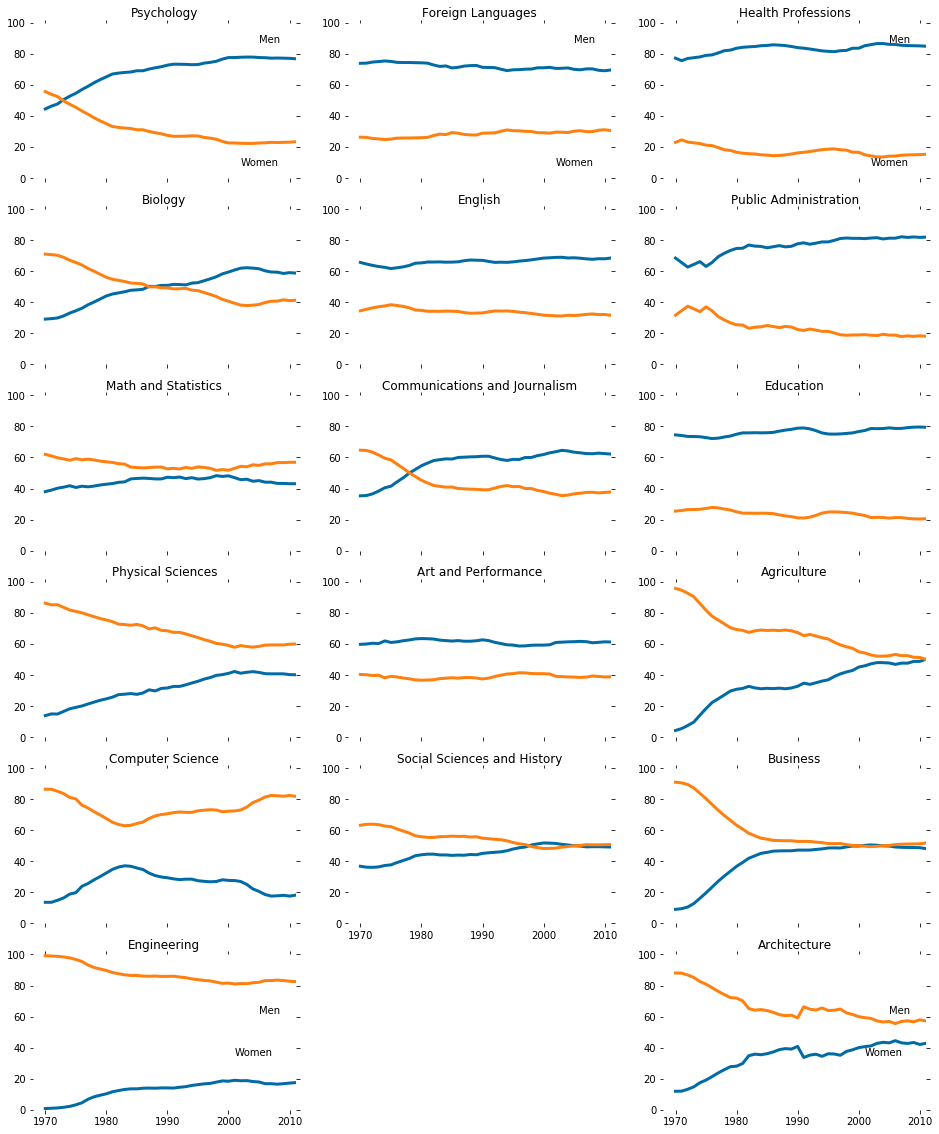

In [58]:
fig = plt.figure(figsize=(16, 20))
# Since I'm  too lazy to write 3 loops, I will iterate in a nested loop. The list below are the three categories
cats_list = [stem_cats,lib_arts_cats, other_cats]

# Because the subplot option does not allow to select the axis for the plot, but rather relies on a succesive index. We
# need to specify the positions of each plot at each loop. Here the index for one column plots is defined by a increment in 
# range position of 3(n of columns), and the starting values for the range are defined also by n, incremented by 1 per row.
range_tuples = [(0,18,3), (1,16,3), (2,20,3)]

for lst in cats_list:
    # the only weird thing here is the * operator in the second range of the zip. This allow the ouput of the list to be
    # enpacked as a tuple direct to the range function. the .index method returns the index as an integer of the main iter
    # list. Since the list has the same lenght like the tuples list, we can save us an extra iterator variable.
    for sp, rt in zip(range(len(lst)), range(*range_tuples[cats_list.index(lst)])):
        ax = fig.add_subplot(6,3,rt+1)
        ax.plot(women_degrees['Year'], women_degrees[lst[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lst[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(lst[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom=False)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        # Since my code is more compact and the loop passes every time , just setting it to 4 would plot also the labels on
        # the other two cols with a larger lenght. Just check that the lenght is 5 and the index 4
        elif sp == 4 and len(lst) == 5:
            ax.tick_params(labelbottom=True)
        elif sp == 5:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')
            ax.tick_params(labelbottom=True)

  
plt.show()


### Setting y-axis labels

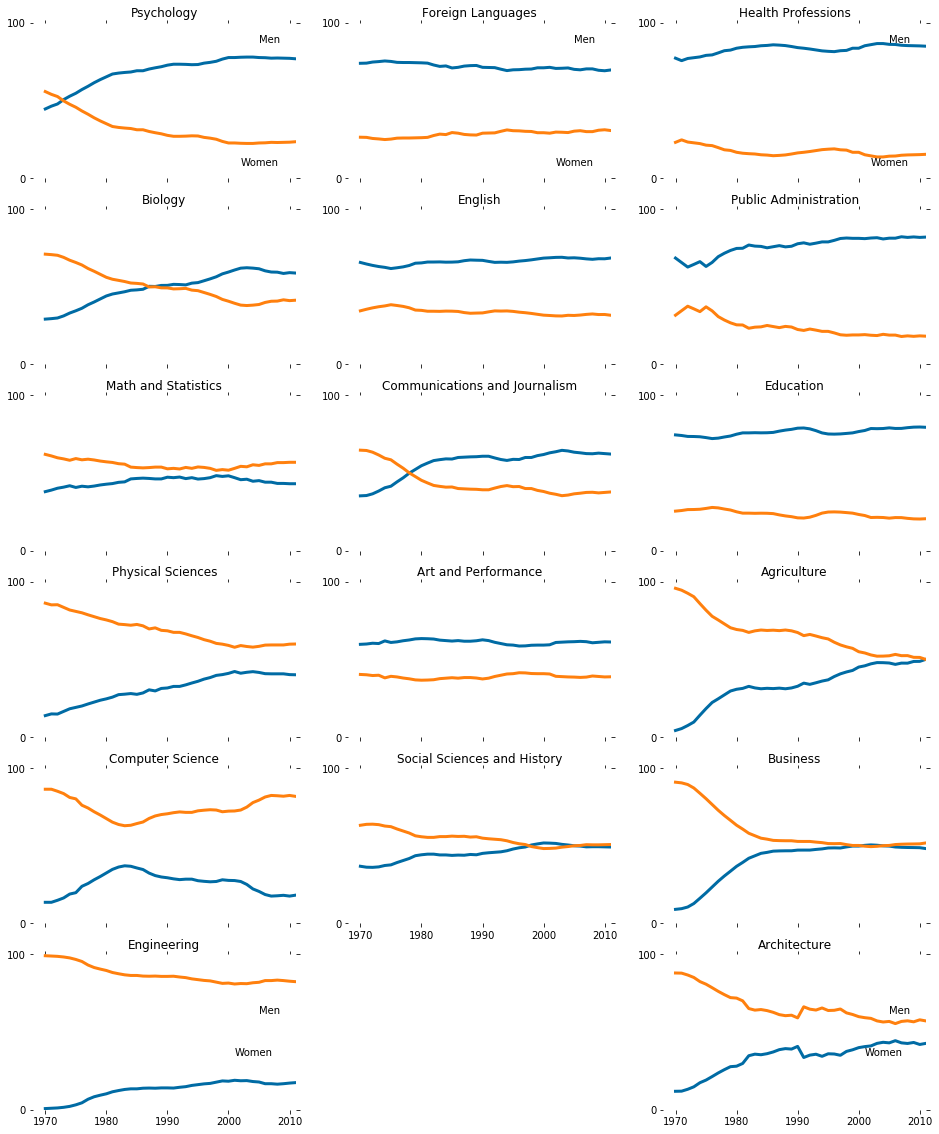

In [59]:
fig = plt.figure(figsize=(16, 20))
# Since I'm  too lazy to write 3 loops, I will iterate in a nested loop. The list below are the three categories
cats_list = [stem_cats,lib_arts_cats, other_cats]

# Because the subplot option does not allow to select the axis for the plot, but rather relies on a succesive index. We
# need to specify the positions of each plot at each loop. Here the index for one column plots is defined by a increment in 
# range position of 3(n of columns), and the starting values for the range are defined also by n, incremented by 1 per row.
range_tuples = [(0,18,3), (1,16,3), (2,20,3)]

for lst in cats_list:
    # the only weird thing here is the * operator in the second range of the zip. This allow the ouput of the list to be
    # enpacked as a tuple direct to the range function. the .index method returns the index as an integer of the main iter
    # list. Since the list has the same lenght like the tuples list, we can save us an extra iterator variable.
    for sp, rt in zip(range(len(lst)), range(*range_tuples[cats_list.index(lst)])):
        ax = fig.add_subplot(6,3,rt+1)
        ax.plot(women_degrees['Year'], women_degrees[lst[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lst[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(lst[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom=False)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        # Since my code is more compact and the loop passes every time , just setting it to 4 would plot also the labels on
        # the other two cols with a larger lenght. Just check that the lenght is 5 and the index 4
        elif sp == 4 and len(lst) == 5:
            ax.tick_params(labelbottom=True)
        elif sp == 5:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')
            ax.tick_params(labelbottom=True)

  
plt.show()


### Adding a horizontal line

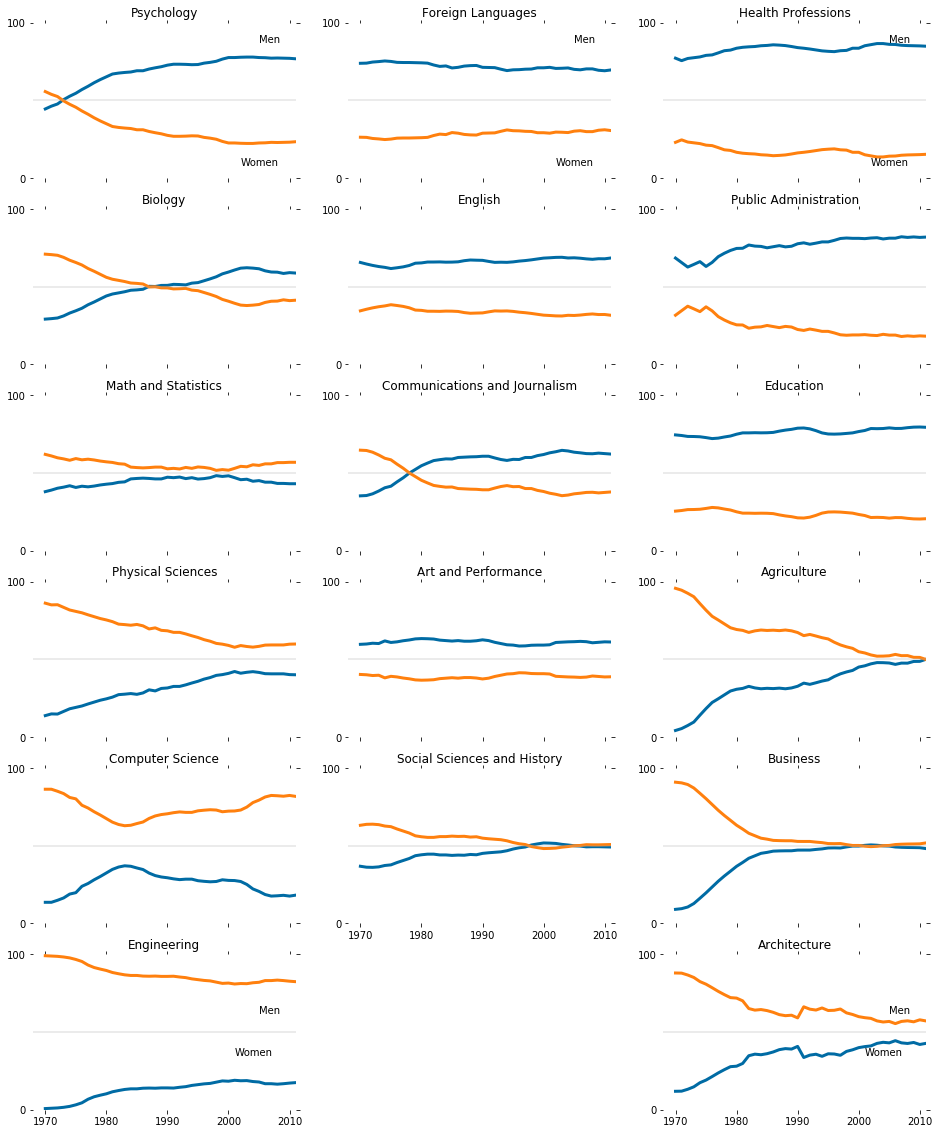

In [60]:
fig = plt.figure(figsize=(16, 20))
# Since I'm  too lazy to write 3 loops, I will iterate in a nested loop. The list below are the three categories
cats_list = [stem_cats,lib_arts_cats, other_cats]

# Because the subplot option does not allow to select the axis for the plot, but rather relies on a succesive index. We
# need to specify the positions of each plot at each loop. Here the index for one column plots is defined by a increment in 
# range position of 3(n of columns), and the starting values for the range are defined also by n, incremented by 1 per row.
range_tuples = [(0,18,3), (1,16,3), (2,20,3)]

for lst in cats_list:
    # the only weird thing here is the * operator in the second range of the zip. This allow the ouput of the list to be
    # enpacked as a tuple direct to the range function. the .index method returns the index as an integer of the main iter
    # list. Since the list has the same lenght like the tuples list, we can save us an extra iterator variable.
    for sp, rt in zip(range(len(lst)), range(*range_tuples[cats_list.index(lst)])):
        ax = fig.add_subplot(6,3,rt+1)
        ax.plot(women_degrees['Year'], women_degrees[lst[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lst[sp]], c=cb_orange, label='Men', linewidth=3)
        
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(lst[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom=False)
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        # Since my code is more compact and the loop passes every time , just setting it to 4 would plot also the labels on
        # the other two cols with a larger lenght. Just check that the lenght is 5 and the index 4
        elif sp == 4 and len(lst) == 5:
            ax.tick_params(labelbottom=True)
        elif sp == 5:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')
            ax.tick_params(labelbottom=True)

  
plt.show()


### Saving the plots as images

In [66]:
# Get backend
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [ ]:
fig.savefig("gender_degrees.pdf")